In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [2]:
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

### DATA COLLECTION

In [1]:
# Web scrapper for infinite scrolling page 
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001')
time.sleep(2)  # Allow 2 seconds for the web page to open
scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
i = 1

while i<90:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
    i += 1
    time.sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break

NameError: name 'webdriver' is not defined

In [5]:
content=driver.page_source
soup = BeautifulSoup(content)

In [6]:
Brandmodel=[]
Zeropay=[]
Totalprice=[]
Handowner=[]
tranmission=[]
        
for x in soup.find_all('h2',attrs={'class':'_3FpCg'}):
    Brandmodel.append(x.text)

for x in soup.find_all('div',attrs={'class':'_2HFRN'}):
    Zeropay.append(x.text)
            
for x in soup.find_all('div',attrs={'class':'_7udZZ'}):
    Totalprice.append(x.text)
        
for x in soup.find_all('ul',attrs={'class':'bVR0c'}):
    Handowner.append(x.text)
        
for x in soup.find_all('p',attrs={'class':'cvakB'}):
    tranmission.append(x.text)
                     
        

In [7]:
len(Brandmodel)
len(Zeropay)
len(Totalprice)
len(Handowner)
len(tranmission)

420

In [8]:
Car_df = pd.DataFrame({'Title':Brandmodel, 'Zero_Down_Payment':Zeropay, 'Total_Price': Totalprice, 'KM_on_Road':Handowner, 'Transmission': tranmission})
Car_df

,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission
0,2015 Maruti Alto 800,"₹6,671/month","₹2,99,899","6,381 km1st OwnerPetrol",LXI Manual
1,2020 Maruti Celerio X,"₹14,695/month","₹6,60,599","4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic
2,2020 Renault TRIBER,"₹15,349/month","₹6,89,999","17,396 km2nd OwnerPetrol",RXZ AT Automatic
3,2015 Maruti Celerio,"₹8,008/month","₹3,59,999","22,939 km1st OwnerPetrol",LXI Manual
4,2013 Hyundai i20,"₹8,435/month","₹3,79,199","34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual
...,...,...,...,...,...
415,2016 Hyundai Grand i10,"₹11,358/month","₹5,10,599","71,122 km1st OwnerPetrol",ASTA AT 1.2 KAPPA VTVT Automatic
416,2018 Honda WR-V,"₹17,075/month","₹7,67,599","25,660 km1st OwnerPetrol",1.2 i-VTEC VX MT Manual
417,2018 Honda City,"₹23,397/month","₹10,51,799","33,613 km1st OwnerPetrol",ZX CVT Automatic
418,2021 Maruti Alto,"₹10,003/month","₹4,49,699","3,401 km1st OwnerPetrol",VXI PLUS Manual


In [9]:
Car_df.to_excel('E:\Python\Python notes\Car_data_f.xlsx')


### DATA CLEANING

In [2]:
df=pd.read_excel('E:\Python\Python notes\Web Scrapping projects\Car_project\Car_data_f.xlsx')
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission
0,0,2015 Maruti Alto 800,"₹6,671/month","₹2,99,899","6,381 km1st OwnerPetrol",LXI Manual
1,1,2020 Maruti Celerio X,"₹14,695/month","₹6,60,599","4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic
2,2,2020 Renault TRIBER,"₹15,349/month","₹6,89,999","17,396 km2nd OwnerPetrol",RXZ AT Automatic
3,3,2015 Maruti Celerio,"₹8,008/month","₹3,59,999","22,939 km1st OwnerPetrol",LXI Manual
4,4,2013 Hyundai i20,"₹8,435/month","₹3,79,199","34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual


In [3]:
df.dtypes

Unnamed: 0            int64
Title                object
Zero_Down_Payment    object
Total_Price          object
KM_on_Road           object
Transmission         object
dtype: object

In [4]:
df['Total_Price']=df['Total_Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(int)
df['Zero_Down_Payment']=df['Zero_Down_Payment'].apply(lambda x:x.replace('₹','').replace(',','').replace('/month','')).astype(int)
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission
0,0,2015 Maruti Alto 800,6671,299899,"6,381 km1st OwnerPetrol",LXI Manual
1,1,2020 Maruti Celerio X,14695,660599,"4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic
2,2,2020 Renault TRIBER,15349,689999,"17,396 km2nd OwnerPetrol",RXZ AT Automatic
3,3,2015 Maruti Celerio,8008,359999,"22,939 km1st OwnerPetrol",LXI Manual
4,4,2013 Hyundai i20,8435,379199,"34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual


In [5]:
df.dtypes

Unnamed: 0            int64
Title                object
Zero_Down_Payment     int32
Total_Price           int32
KM_on_Road           object
Transmission         object
dtype: object

In [6]:
regex='\d+'
df['Year'] =df['Title'].apply(lambda x:re.compile(regex).search(x).group(0)).astype(int)
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year
0,0,2015 Maruti Alto 800,6671,299899,"6,381 km1st OwnerPetrol",LXI Manual,2015
1,1,2020 Maruti Celerio X,14695,660599,"4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic,2020
2,2,2020 Renault TRIBER,15349,689999,"17,396 km2nd OwnerPetrol",RXZ AT Automatic,2020
3,3,2015 Maruti Celerio,8008,359999,"22,939 km1st OwnerPetrol",LXI Manual,2015
4,4,2013 Hyundai i20,8435,379199,"34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual,2013


In [7]:
df.dtypes

Unnamed: 0            int64
Title                object
Zero_Down_Payment     int32
Total_Price           int32
KM_on_Road           object
Transmission         object
Year                  int32
dtype: object

In [8]:
regex="[1st or 2nd or 3rd\s]+Owner"
df['Owner'] =df['KM_on_Road'].apply(lambda x:re.compile(regex).search(x).group(0))
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner
0,0,2015 Maruti Alto 800,6671,299899,"6,381 km1st OwnerPetrol",LXI Manual,2015,1st Owner
1,1,2020 Maruti Celerio X,14695,660599,"4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic,2020,1st Owner
2,2,2020 Renault TRIBER,15349,689999,"17,396 km2nd OwnerPetrol",RXZ AT Automatic,2020,2nd Owner
3,3,2015 Maruti Celerio,8008,359999,"22,939 km1st OwnerPetrol",LXI Manual,2015,1st Owner
4,4,2013 Hyundai i20,8435,379199,"34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual,2013,1st Owner


In [9]:
regex='\D+'
df['Model_name']=df['Title'].apply(lambda x:re.compile(regex).search(x).group(0))
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name
0,0,2015 Maruti Alto 800,6671,299899,"6,381 km1st OwnerPetrol",LXI Manual,2015,1st Owner,Maruti Alto
1,1,2020 Maruti Celerio X,14695,660599,"4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X
2,2,2020 Renault TRIBER,15349,689999,"17,396 km2nd OwnerPetrol",RXZ AT Automatic,2020,2nd Owner,Renault TRIBER
3,3,2015 Maruti Celerio,8008,359999,"22,939 km1st OwnerPetrol",LXI Manual,2015,1st Owner,Maruti Celerio
4,4,2013 Hyundai i20,8435,379199,"34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i


In [10]:
regex='[P|D]\D+$'
df['Oil'] =df['KM_on_Road'].apply(lambda x:re.compile(regex).search(x).group(0))
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name,Oil
0,0,2015 Maruti Alto 800,6671,299899,"6,381 km1st OwnerPetrol",LXI Manual,2015,1st Owner,Maruti Alto,Petrol
1,1,2020 Maruti Celerio X,14695,660599,"4,613 km1st OwnerPetrol",ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X,Petrol
2,2,2020 Renault TRIBER,15349,689999,"17,396 km2nd OwnerPetrol",RXZ AT Automatic,2020,2nd Owner,Renault TRIBER,Petrol
3,3,2015 Maruti Celerio,8008,359999,"22,939 km1st OwnerPetrol",LXI Manual,2015,1st Owner,Maruti Celerio,Petrol
4,4,2013 Hyundai i20,8435,379199,"34,587 km1st OwnerPetrol",MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i,Petrol


In [11]:
df['KM_on_Road']=df['KM_on_Road'].apply(lambda x:x.replace(',','').replace('km1st OwnerPetrol','').replace('km2nd OwnerPetrol','').replace( 'km2nd OwnerDiesel','').replace('km1st OwnerDiesel','').replace('km3rd OwnerDiesel','').replace('km3rd OwnerPetrol','').replace('+ CNG','')).astype(int)
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name,Oil
0,0,2015 Maruti Alto 800,6671,299899,6381,LXI Manual,2015,1st Owner,Maruti Alto,Petrol
1,1,2020 Maruti Celerio X,14695,660599,4613,ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X,Petrol
2,2,2020 Renault TRIBER,15349,689999,17396,RXZ AT Automatic,2020,2nd Owner,Renault TRIBER,Petrol
3,3,2015 Maruti Celerio,8008,359999,22939,LXI Manual,2015,1st Owner,Maruti Celerio,Petrol
4,4,2013 Hyundai i20,8435,379199,34587,MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i,Petrol


In [12]:
df.dtypes

Unnamed: 0            int64
Title                object
Zero_Down_Payment     int32
Total_Price           int32
KM_on_Road            int32
Transmission         object
Year                  int32
Owner                object
Model_name           object
Oil                  object
dtype: object

In [13]:
regex='\D+\s'
df['Brand_name'] = df['Model_name'].apply(lambda x:re.compile(regex).search(x).group(0))
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name,Oil,Brand_name
0,0,2015 Maruti Alto 800,6671,299899,6381,LXI Manual,2015,1st Owner,Maruti Alto,Petrol,Maruti Alto
1,1,2020 Maruti Celerio X,14695,660599,4613,ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X,Petrol,Maruti Celerio
2,2,2020 Renault TRIBER,15349,689999,17396,RXZ AT Automatic,2020,2nd Owner,Renault TRIBER,Petrol,Renault
3,3,2015 Maruti Celerio,8008,359999,22939,LXI Manual,2015,1st Owner,Maruti Celerio,Petrol,Maruti
4,4,2013 Hyundai i20,8435,379199,34587,MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i,Petrol,Hyundai


In [14]:
df.Brand_name.unique()

array([' Maruti Alto ', ' Maruti Celerio ', ' Renault ', ' Maruti ',
       ' Hyundai ', ' Maruti Wagon R ', ' Maruti Swift ', ' Mahindra ',
       ' KIA ', ' Honda ', ' Tata ', ' MG ', ' Toyota URBAN ',
       ' Hyundai Elite ', ' Maruti New  ', ' Volkswagen ',
       ' Toyota Innova ', ' Hyundai Grand ', ' Toyota ', ' Maruti S ',
       ' Ford ', ' Toyota Corolla ', ' Mahindra XUV ', ' Hyundai NEW ',
       ' Datsun Redi ', ' Skoda ', ' Maruti Vitara ', ' Jeep ', ' BMW ',
       ' Ford Figo '], dtype=object)

In [15]:
df['Brand_name']=df['Brand_name'].apply(lambda x:x.replace('Maruti Alto','Maruti').replace('Maruti Celerio','Maruti').replace('Maruti Wagon R','Maruti').replace('Maruti Swift','Maruti').replace('Toyota URBAN','Toyota').replace('Hyundai Elite','Hyundai').replace('Maruti New ','Maruti').replace('Toyota Innova','Toyota').replace('Hyundai Grand','Hyundai').replace('Maruti S','Maruti').replace('Toyota Corolla','Toyota').replace('Mahindra XUV','Mahindra').replace('Hyundai NEW','Hyundai').replace('Datsun Redi','Datsun').replace('Maruti Vitara','Maruti').replace('Ford Figo','Ford'))
df.head()

,Unnamed: 0,Title,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name,Oil,Brand_name
0,0,2015 Maruti Alto 800,6671,299899,6381,LXI Manual,2015,1st Owner,Maruti Alto,Petrol,Maruti
1,1,2020 Maruti Celerio X,14695,660599,4613,ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X,Petrol,Maruti
2,2,2020 Renault TRIBER,15349,689999,17396,RXZ AT Automatic,2020,2nd Owner,Renault TRIBER,Petrol,Renault
3,3,2015 Maruti Celerio,8008,359999,22939,LXI Manual,2015,1st Owner,Maruti Celerio,Petrol,Maruti
4,4,2013 Hyundai i20,8435,379199,34587,MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i,Petrol,Hyundai


In [16]:
df.Brand_name.unique()

array([' Maruti ', ' Renault ', ' Hyundai ', ' Mahindra ', ' KIA ',
       ' Honda ', ' Tata ', ' MG ', ' Toyota ', ' Volkswagen ', ' Ford ',
       ' Datsun ', ' Skoda ', ' Jeep ', ' BMW '], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         420 non-null    int64 
 1   Title              420 non-null    object
 2   Zero_Down_Payment  420 non-null    int32 
 3   Total_Price        420 non-null    int32 
 4   KM_on_Road         420 non-null    int32 
 5   Transmission       420 non-null    object
 6   Year               420 non-null    int32 
 7   Owner              420 non-null    object
 8   Model_name         420 non-null    object
 9   Oil                420 non-null    object
 10  Brand_name         420 non-null    object
dtypes: int32(4), int64(1), object(6)
memory usage: 29.7+ KB


In [18]:
df.drop(['Unnamed: 0','Title'],axis=1,inplace=True)

In [19]:
df.head()

,Zero_Down_Payment,Total_Price,KM_on_Road,Transmission,Year,Owner,Model_name,Oil,Brand_name
0,6671,299899,6381,LXI Manual,2015,1st Owner,Maruti Alto,Petrol,Maruti
1,14695,660599,4613,ZXI OPT AMT Automatic,2020,1st Owner,Maruti Celerio X,Petrol,Maruti
2,15349,689999,17396,RXZ AT Automatic,2020,2nd Owner,Renault TRIBER,Petrol,Renault
3,8008,359999,22939,LXI Manual,2015,1st Owner,Maruti Celerio,Petrol,Maruti
4,8435,379199,34587,MAGNA O 1.2 Manual,2013,1st Owner,Hyundai i,Petrol,Hyundai


In [20]:
df = df[['Brand_name','Model_name','Year','Total_Price','Zero_Down_Payment','Owner','Oil','KM_on_Road','Transmission']]

In [21]:
df

,Brand_name,Model_name,Year,Total_Price,Zero_Down_Payment,Owner,Oil,KM_on_Road,Transmission
0,Maruti,Maruti Alto,2015,299899,6671,1st Owner,Petrol,6381,LXI Manual
1,Maruti,Maruti Celerio X,2020,660599,14695,1st Owner,Petrol,4613,ZXI OPT AMT Automatic
2,Renault,Renault TRIBER,2020,689999,15349,2nd Owner,Petrol,17396,RXZ AT Automatic
3,Maruti,Maruti Celerio,2015,359999,8008,1st Owner,Petrol,22939,LXI Manual
4,Hyundai,Hyundai i,2013,379199,8435,1st Owner,Petrol,34587,MAGNA O 1.2 Manual
...,...,...,...,...,...,...,...,...,...
415,Hyundai,Hyundai Grand i,2016,510599,11358,1st Owner,Petrol,71122,ASTA AT 1.2 KAPPA VTVT Automatic
416,Honda,Honda WR-V,2018,767599,17075,1st Owner,Petrol,25660,1.2 i-VTEC VX MT Manual
417,Honda,Honda City,2018,1051799,23397,1st Owner,Petrol,33613,ZX CVT Automatic
418,Maruti,Maruti Alto,2021,449699,10003,1st Owner,Petrol,3401,VXI PLUS Manual


In [22]:
df.dtypes

Brand_name           object
Model_name           object
Year                  int32
Total_Price           int32
Zero_Down_Payment     int32
Owner                object
Oil                  object
KM_on_Road            int32
Transmission         object
dtype: object

In [25]:
df.to_excel('E:\Python\Python notes\Car_df.xlsx')#saved th excel file after cleaning the data


### DATA VISUALIZATION

In [4]:
df=pd.read_excel("E:\Python\Python notes\Web Scrapping projects\Car_project\Car_df.xlsx")


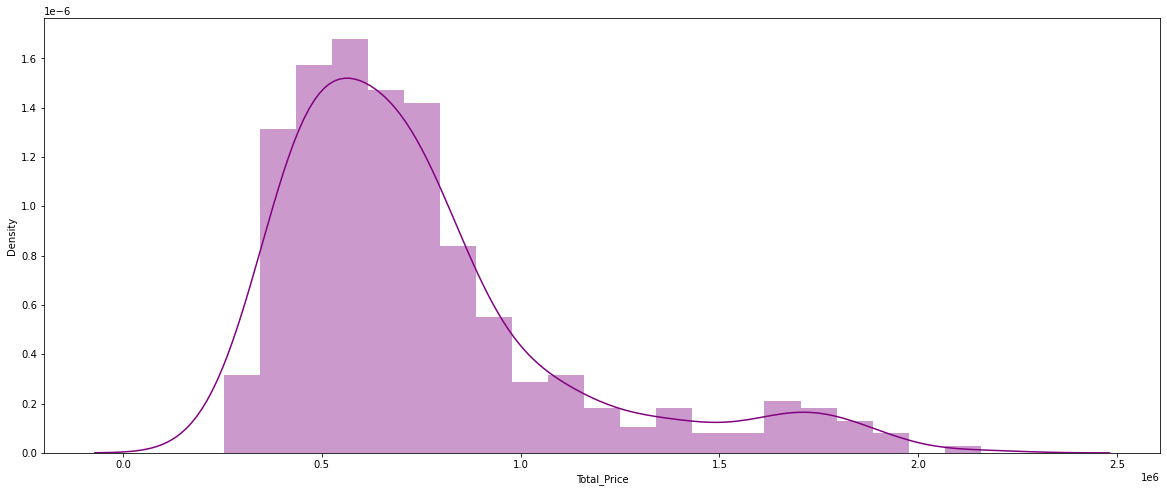

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,8))
sns.distplot(df['Total_Price'],color = 'purple')
plt.show()

This is an Distribution plot which shows us that on which price range most of the cars are. 
And by looking into this plot we can see that most of the cars price are in the range between 4000000 - 8000000

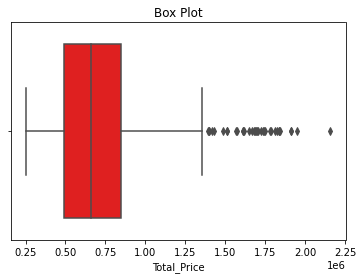

In [24]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(df['Total_Price'],color='red')
plt.title('Box Plot')
plt.show()

This is an Box plot which shows us how many out layers are there.
In this plot we can see that there are many outlayers present.

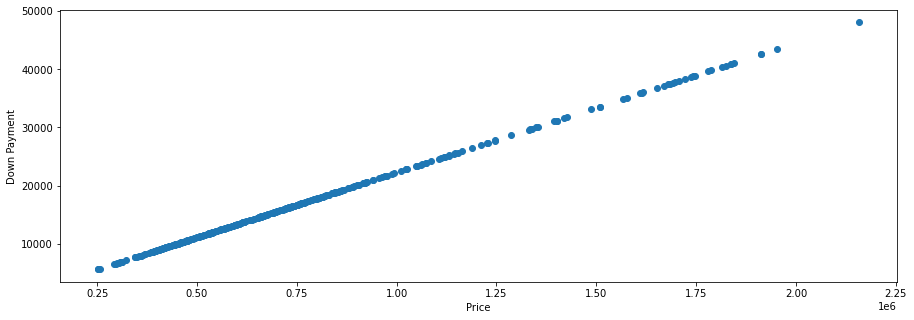

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(df['Total_Price'],df['Zero_Down_Payment'])
plt.xlabel('Price')
plt.ylabel('Down Payment')
plt.show()

From this scatter plot we can understand that price of the car and Down payment are directly proportional.


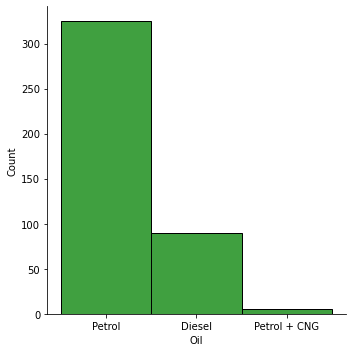

In [26]:
sns.displot(df['Oil'],kind='hist',color='green')

From this plot we can see the number of cars with petrol, Diesel and Petrol+CNG
Petrol - 300+ cars 
Diesel – Approx 90 cars
Petrol+CNG  - Approx  5 cars

In [32]:
df.head()

,Brand_name,Model_name,Year,Total_Price,Zero_Down_Payment,Owner,Oil,KM_on_Road,Transmission
0,Maruti,Maruti Alto,2015,299899,6671,1st Owner,Petrol,6381,LXI Manual
1,Maruti,Maruti Celerio X,2020,660599,14695,1st Owner,Petrol,4613,ZXI OPT AMT Automatic
2,Renault,Renault TRIBER,2020,689999,15349,2nd Owner,Petrol,17396,RXZ AT Automatic
3,Maruti,Maruti Celerio,2015,359999,8008,1st Owner,Petrol,22939,LXI Manual
4,Hyundai,Hyundai i,2013,379199,8435,1st Owner,Petrol,34587,MAGNA O 1.2 Manual


<AxesSubplot:xlabel='Brand_name'>

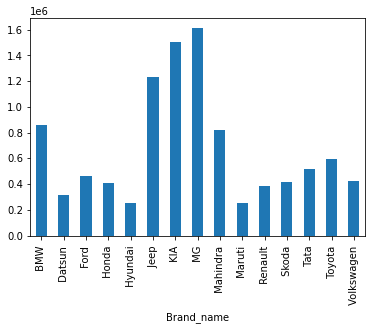

In [33]:
df.groupby('Brand_name')['Total_Price'].min().plot(kind='bar')

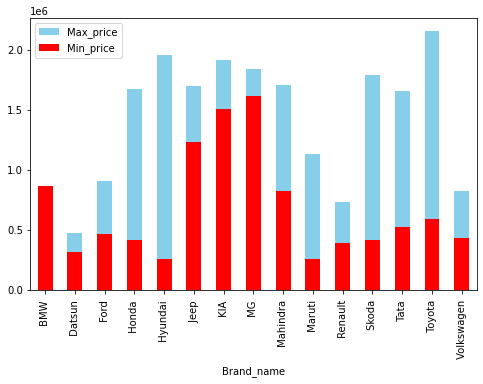

In [34]:
plt.figure(figsize=(8,5))
df.groupby('Brand_name')['Total_Price'].max().plot(kind='bar',color='skyblue',label='Max_price')
df.groupby('Brand_name')['Total_Price'].min().plot(kind='bar',color='red',label='Min_price')
plt.legend()

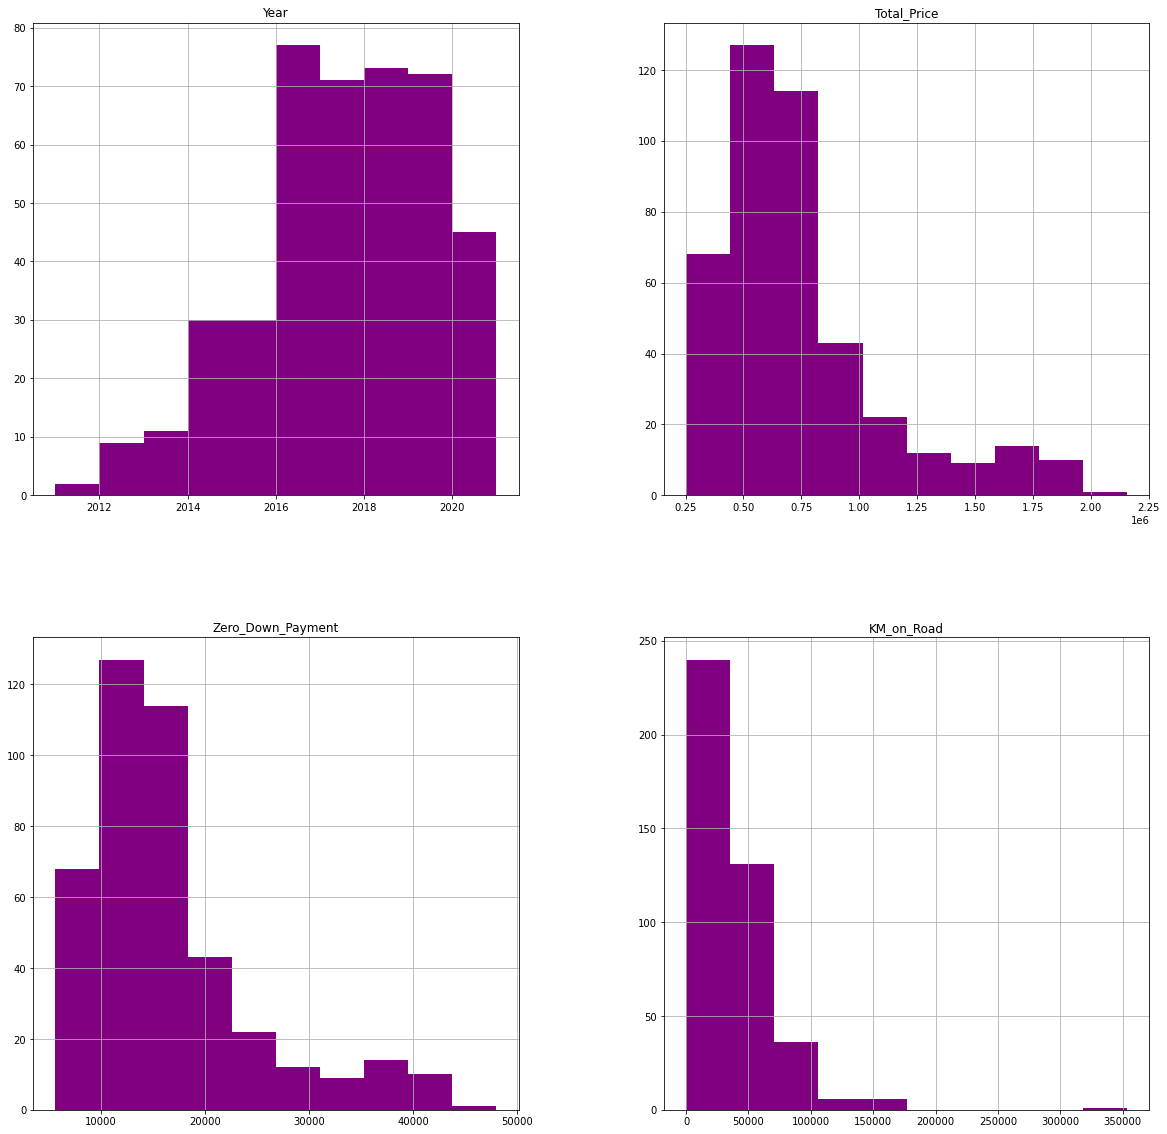

In [35]:
df.hist(figsize=(20,20),color='purple')
plt.show()

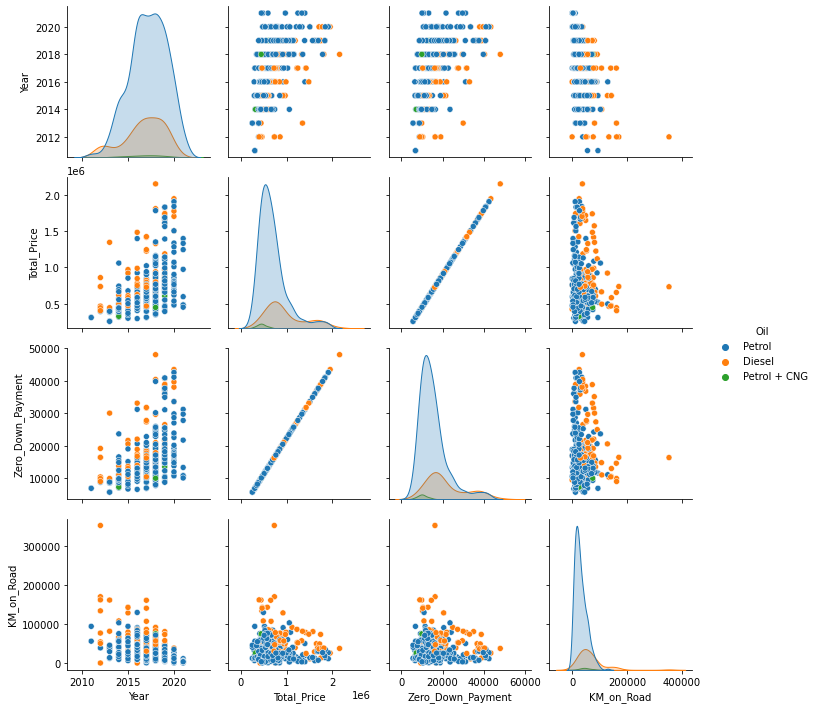

In [36]:
sns.pairplot(df,hue='Oil')
plt.show()